In [68]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image
from plottable.plots import bar, percentile_bars, percentile_stars, progress_donut
from plottable.formatters import decimal_to_percent


In [69]:
df=pd.read_html("https://www.espncricinfo.com/series/indian-premier-league-2024-1410320/points-table-standings",attrs={'class':'ds-w-full ds-table ds-table-md ds-table-auto  ds-w-full'})[0]
df

,Teams,M,W,L,T,N/R,PT,NRR,Series Form,For,Against,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1Kolkata Knight Riders,14,9,3,0,2,20,1.428,WWWANR,2389/225.0,2135/232.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"NRMay 19, 2024, 70th Match, KKR vs RRNo result...","NRMay 19, 2024, 70th Match, KKR vs RRNo result...","NRMay 19, 2024, 70th Match, KKR vs RRNo result...","NRMay 19, 2024, 70th Match, KKR vs RRNo result...","NRMay 19, 2024, 70th Match, KKR vs RRNo result...","NRMay 19, 2024, 70th Match, KKR vs RRNo result...","NRMay 19, 2024, 70th Match, KKR vs RRNo result...","NRMay 19, 2024, 70th Match, KKR vs RRNo result...","NRMay 19, 2024, 70th Match, KKR vs RRNo result...","NRMay 19, 2024, 70th Match, KKR vs RRNo result...","NRMay 19, 2024, 70th Match, KKR vs RRNo result...","NRMay 19, 2024, 70th Match, KKR vs RRNo result...","NRMay 19, 2024, 70th Match, KKR vs RRNo result...","NRMay 19, 2024, 70th Match, KKR vs RRNo result...","NRMay 19, 2024, 70th Match, KKR vs RRNo result...","NRMay 19, 2024, 70th Match, KKR vs RRNo result...","NRMay 19, 2024, 70th Match, KKR vs RRNo result...","NRMay 19, 2024, 70th Match, KKR vs RRNo result...","NRMay 19, 2024, 70th Match, KKR vs RRNo result...","NRMay 19, 2024, 70th Match, KKR vs RRNo result..."
2,2Sunrisers Hyderabad,14,8,5,0,1,17,0.414,WLWAW,2605/247.0,2599/256.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"WMay 19, 2024, 69th Match, SRH vs PBKSSRH won ...","WMay 19, 2024, 69th Match, SRH vs PBKSSRH won ...","WMay 19, 2024, 69th Match, SRH vs PBKSSRH won ...","WMay 19, 2024, 69th Match, SRH vs PBKSSRH won ...","WMay 19, 2024, 69th Match, SRH vs PBKSSRH won ...","WMay 19, 2024, 69th Match, SRH vs PBKSSRH won ...","WMay 19, 2024, 69th Match, SRH vs PBKSSRH won ...","WMay 19, 2024, 69th Match, SRH vs PBKSSRH won ...","WMay 19, 2024, 69th Match, SRH vs PBKSSRH won ...","WMay 19, 2024, 69th Match, SRH vs PBKSSRH won ...","WMay 19, 2024, 69th Match, SRH vs PBKSSRH won ...","WMay 19, 2024, 69th Match, SRH vs PBKSSRH won ...","WMay 19, 2024, 69th Match, SRH vs PBKSSRH won ...","WMay 19, 2024, 69th Match, SRH vs PBKSSRH won ...","WMay 19, 2024, 69th Match, SRH vs PBKSSRH won ...","WMay 19, 2024, 69th Match, SRH vs PBKSSRH won ...","WMay 19, 2024, 69th Match, SRH vs PBKSSRH won ...","WMay 19, 2024, 69th Match, SRH vs PBKSSRH won ...","WMay 19, 2024, 69th Match, SRH vs PBKSSRH won ...","WMay 19, 2024, 69th Match, SRH vs PBKSSRH won ..."
4,3Rajasthan Royals,14,8,5,0,1,17,0.273,LLLLNR,2334/252.1,2310/257.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"NRMay 19, 2024, 70th Match, RR vs KKRNo result...","NRMay 19, 2024, 70th Match, RR vs KKRNo result...","NRMay 19, 2024, 70th Match, RR vs KKRNo result...","NRMay 19, 2024, 70th Match, RR vs KKRNo result...","NRMay 19, 2024, 70th Match, RR vs KKRNo result...","NRMay 19, 2024, 70th Match, RR vs KKRNo result...","NRMay 19, 2024, 70th Match, RR vs KKRNo result...","NRMay 19, 2024, 70th Match, RR vs KKRNo result...","NRMay 19, 2024, 70th Match, RR vs KKRNo result...","NRMay 19, 2024, 70th Match, RR vs KKRNo result...","NRMay 19, 2024, 70th Match, RR vs KKRNo result...","NRMay 19, 2024, 70th Match, RR vs KKRNo result...","NRMay 19, 2024, 70th Match, RR vs KKRNo result...","NRMay 19, 2024, 70th Match, RR vs KKRNo result...","NRMay 19, 2024, 70th Match, RR vs KKRNo result...","NRMay 19, 2024, 70th Match, RR vs KKRNo result...","NRMay 19, 2024, 70th Match, RR vs KKRNo result...","NRMay 19, 2024, 70th Match, RR vs KKRNo result...","NRMay 19, 2024, 70th Match, RR vs KKRNo result...","NRMay 19, 2024, 70th Match, RR vs KKRNo result..."
6,4Royal Challengers Bengaluru,14,7,7,0,0,14,0.459,WWWWW,2758/269.0,2646/270.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"WMay 18, 2024, 68th Match, RCB vs CSKRCB won b...","WMay 18, 2024, 68th Match, RCB vs CSKRCB won b...","WMay 18, 2024, 68th Match, RCB vs CSKRCB won b...","WMay 18, 2024, 68th Match, RCB vs CSKRCB won b...","WMay 18, 2024, 68th Match, RCB vs CSKRCB won b...","WMay 18, 2024, 6

In [70]:
df=df.drop([1,3,5,7,9,11,13,15,17,19],axis=0)
df

,Teams,M,W,L,T,N/R,PT,NRR,Series Form,For,Against,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1Kolkata Knight Riders,14,9,3,0,2,20,1.428,WWWANR,2389/225.0,2135/232.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2Sunrisers Hyderabad,14,8,5,0,1,17,0.414,WLWAW,2605/247.0,2599/256.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3Rajasthan Royals,14,8,5,0,1,17,0.273,LLLLNR,2334/252.1,2310/257.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4Royal Challengers Bengaluru,14,7,7,0,0,14,0.459,WWWWW,2758/269.0,2646/270.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5Chennai Super Kings,14,7,7,0,0,14,0.392,LWLWL,2524/274.4,2415/274.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,6Delhi Capitals,14,7,7,0,0,14,-0.377,WLWLW,2573/267.0,2762/275.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,7Lucknow Super Giants,14,7,7,0,0,14,-0.667,WLLLW,2483/277.5,2521/262.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,8Gujarat Titans,14,5,7,0,2,12,-1.063,LLWAA,2040/238.2,2101/218.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,9Punjab Kings,14,5,9,0,0,10,-0.353,WLLWL,2487/274.3,2612/277.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,10Mumbai Indians,14,4,10,0,0,8,-0.318,LLWLL,2568/268.5,2660/269.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df.reset_index(inplace=True)

In [72]:
df.columns

Index(['index', 'Teams', 'M', 'W', 'L', 'T', 'N/R', 'PT', 'NRR', 'Series Form',
       'For', 'Against', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19'],
      dtype='object')

In [73]:
df=df[['Teams', 'M', 'W', 'L', 'T', 'N/R', 'PT', 'NRR']]
df

,Teams,M,W,L,T,N/R,PT,NRR
0,1Kolkata Knight Riders,14,9,3,0,2,20,1.428
1,2Sunrisers Hyderabad,14,8,5,0,1,17,0.414
2,3Rajasthan Royals,14,8,5,0,1,17,0.273
3,4Royal Challengers Bengaluru,14,7,7,0,0,14,0.459
4,5Chennai Super Kings,14,7,7,0,0,14,0.392
5,6Delhi Capitals,14,7,7,0,0,14,-0.377
6,7Lucknow Super Giants,14,7,7,0,0,14,-0.667
7,8Gujarat Titans,14,5,7,0,2,12,-1.063
8,9Punjab Kings,14,5,9,0,0,10,-0.353
9,10Mumbai Indians,14,4,10,0,0,8,-0.318


In [74]:
ls=list(df['Teams'])
lst=[]
for x in ls:
    if x[:2]=='10':
        y=x[2:]
    else:
        y=x[1:]
    lst.append(y)
lst
df.loc[:,'Teams']=lst

In [75]:
df

,Teams,M,W,L,T,N/R,PT,NRR
0,Kolkata Knight Riders,14,9,3,0,2,20,1.428
1,Sunrisers Hyderabad,14,8,5,0,1,17,0.414
2,Rajasthan Royals,14,8,5,0,1,17,0.273
3,Royal Challengers Bengaluru,14,7,7,0,0,14,0.459
4,Chennai Super Kings,14,7,7,0,0,14,0.392
5,Delhi Capitals,14,7,7,0,0,14,-0.377
6,Lucknow Super Giants,14,7,7,0,0,14,-0.667
7,Gujarat Titans,14,5,7,0,2,12,-1.063
8,Punjab Kings,14,5,9,0,0,10,-0.353
9,Mumbai Indians,14,4,10,0,0,8,-0.318


In [76]:
df.columns

Index(['Teams', 'M', 'W', 'L', 'T', 'N/R', 'PT', 'NRR'], dtype='object')

In [77]:
int_to=['M', 'W', 'L', 'T', 'N/R', 'PT']
float_to=['NRR']
for x in int_to:
    df[x]=df[x].astype('int')
for y in float_to:
    df[y]=df[y].astype("float")
df

C:\Users\user\AppData\Local\Temp\ipykernel_5548\416410224.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x]=df[x].astype('int')
C:\Users\user\AppData\Local\Temp\ipykernel_5548\416410224.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[x]=df[x].astype('int')
C:\Users\user\AppData\Local\Temp\ipykernel_5548\416410224.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

,Teams,M,W,L,T,N/R,PT,NRR
0,Kolkata Knight Riders,14,9,3,0,2,20,1.428
1,Sunrisers Hyderabad,14,8,5,0,1,17,0.414
2,Rajasthan Royals,14,8,5,0,1,17,0.273
3,Royal Challengers Bengaluru,14,7,7,0,0,14,0.459
4,Chennai Super Kings,14,7,7,0,0,14,0.392
5,Delhi Capitals,14,7,7,0,0,14,-0.377
6,Lucknow Super Giants,14,7,7,0,0,14,-0.667
7,Gujarat Titans,14,5,7,0,2,12,-1.063
8,Punjab Kings,14,5,9,0,0,10,-0.353
9,Mumbai Indians,14,4,10,0,0,8,-0.318


In [78]:
df['Rk']=np.arange(1,11)

C:\Users\user\AppData\Local\Temp\ipykernel_5548\3535938820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rk']=np.arange(1,11)


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Teams   10 non-null     object 
 1   M       10 non-null     int32  
 2   W       10 non-null     int32  
 3   L       10 non-null     int32  
 4   T       10 non-null     int32  
 5   N/R     10 non-null     int32  
 6   PT      10 non-null     int32  
 7   NRR     10 non-null     float64
 8   Rk      10 non-null     int32  
dtypes: float64(1), int32(7), object(1)
memory usage: 572.0+ bytes


In [194]:
bg_color="#ffffff"
text_color="#000000"

plt.rcParams["text.color"]=text_color
plt.rcParams['font.family']='Bebas Neue'
plt.rcParams['font.size']=40

In [81]:
df['Badge']=df['Teams'].apply(
    lambda x: f"C://Users//user//Desktop//Github//Projects//Cricket//{x}.png"
)

C:\Users\user\AppData\Local\Temp\ipykernel_5548\252529558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Badge']=df['Teams'].apply(


In [82]:
df

,Teams,M,W,L,T,N/R,PT,NRR,Rk,Badge
0,Kolkata Knight Riders,14,9,3,0,2,20,1.428,1,C://Users//user//Desktop//Github//Projects//Cr...
1,Sunrisers Hyderabad,14,8,5,0,1,17,0.414,2,C://Users//user//Desktop//Github//Projects//Cr...
2,Rajasthan Royals,14,8,5,0,1,17,0.273,3,C://Users//user//Desktop//Github//Projects//Cr...
3,Royal Challengers Bengaluru,14,7,7,0,0,14,0.459,4,C://Users//user//Desktop//Github//Projects//Cr...
4,Chennai Super Kings,14,7,7,0,0,14,0.392,5,C://Users//user//Desktop//Github//Projects//Cr...
5,Delhi Capitals,14,7,7,0,0,14,-0.377,6,C://Users//user//Desktop//Github//Projects//Cr...
6,Lucknow Super Giants,14,7,7,0,0,14,-0.667,7,C://Users//user//Desktop//Github//Projects//Cr...
7,Gujarat Titans,14,5,7,0,2,12,-1.063,8,C://Users//user//Desktop//Github//Projects//Cr...
8,Punjab Kings,14,5,9,0,0,10,-0.353,9,C://Users//user//Desktop//Github//Projects//Cr...
9,Mumbai Indians,14,4,10,0,0,8,-0.318,10,C://Users//user//Desktop//Github//Projects//Cr...


In [83]:
df=df[['Rk','Badge','Teams', 'M', 'W', 'L', 'T', 'N/R', 'PT', 'NRR']]

In [84]:
df['Teams'].unique()

array(['Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Rajasthan Royals',
       'Royal Challengers Bengaluru', 'Chennai Super Kings',
       'Delhi Capitals', 'Lucknow Super Giants', 'Gujarat Titans',
       'Punjab Kings', 'Mumbai Indians'], dtype=object)

In [85]:
df.columns

Index(['Rk', 'Badge', 'Teams', 'M', 'W', 'L', 'T', 'N/R', 'PT', 'NRR'], dtype='object')

In [175]:
col_defs=[
    ColumnDefinition(
        name="Rk",
        textprops={'ha':'center'},
        width=0.5,
        border='left',
    ),
    ColumnDefinition(
        name="Badge",
        textprops={'ha':'center','va':'center','color':bg_color},
        width=0.75,
        plot_fn=image,
        title="",
    ),
    ColumnDefinition(
        name="Teams",
        textprops={'ha':'left','fontweight':'bold','fontsize':27},
        width=1.75,
        title="Teams",
    ),
    ColumnDefinition(
        name="M",
        textprops={'ha':'center'},
        width=0.5,
        title="M",
    ),
    ColumnDefinition(
        name="W",
        textprops={'ha':'center'},
        width=0.5,
        title="W",
    ),
        ColumnDefinition(
        name="L",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="T",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="N/R",
        textprops={"ha": "center"},
        width=0.5, 
    ),
    ColumnDefinition(
        name="PT",
        textprops={"ha": "center",'fontweight':'bold'},
        width=0.5,
        title='Pts'
    ),
    ColumnDefinition(
        name="NRR",
        textprops={"ha": "center"},
        width=0.5,
        border='right',
    ),
]

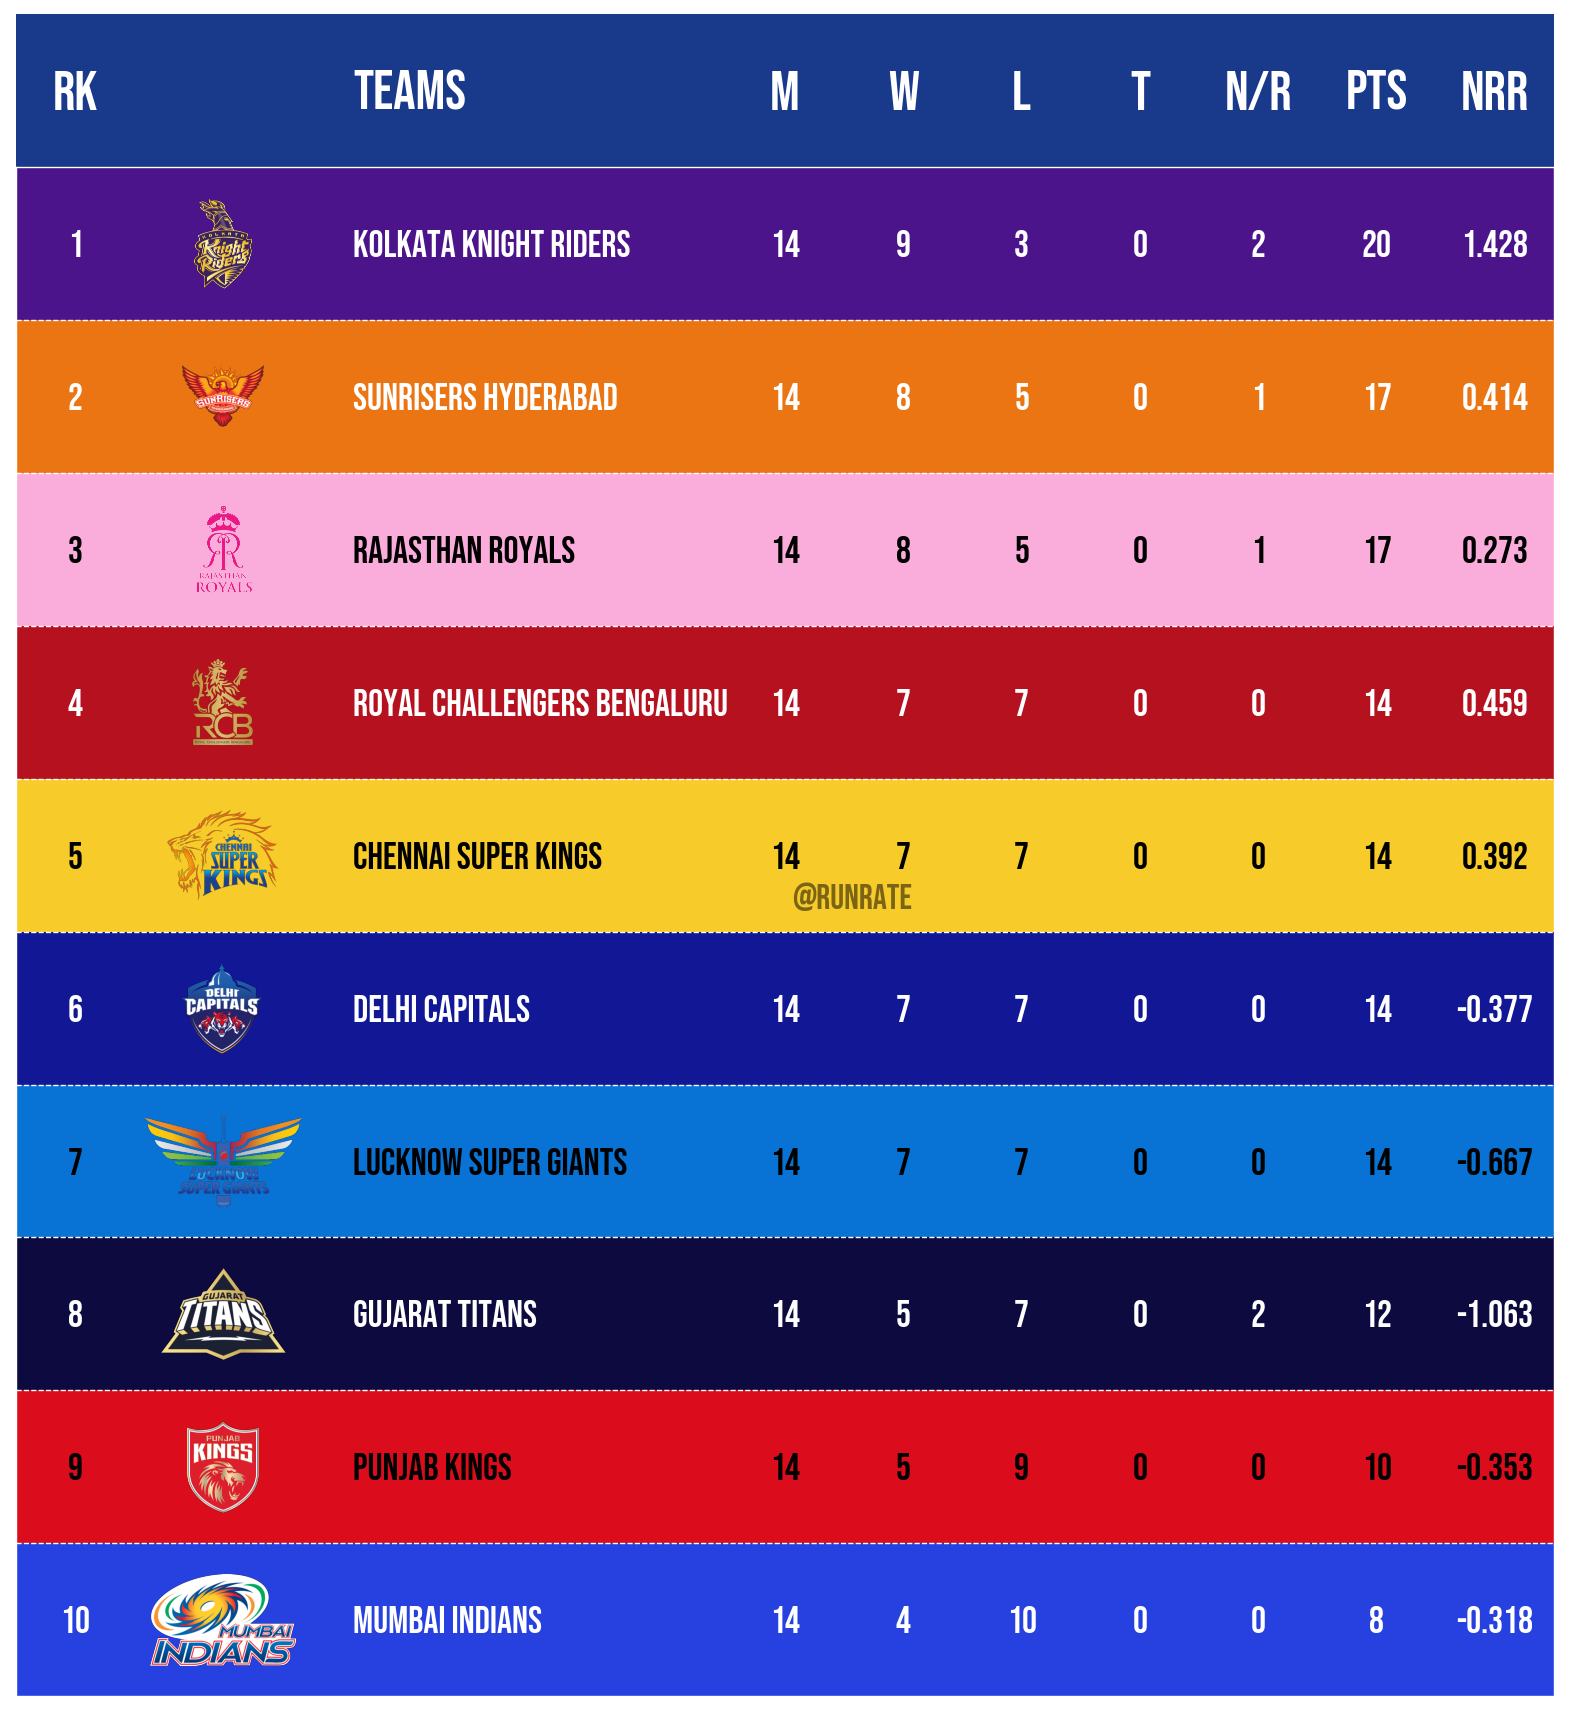

In [214]:
fig, ax = plt.subplots(figsize=(20, 22))
fig.set_facecolor('#ffffff')
ax.set_facecolor('#19398A')

table = Table(
    df,
    column_definitions=col_defs,
    index_col="Rk",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": '--',"color":"#ffffff"},
    footer_divider=True,
    textprops={"fontsize": 27,"color":'#ffffff'},
    footer_divider_kw={"color": "#ffffff", "lw": 1},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-","color":"#ffffff"},
    column_border_kw={"linewidth": 1, "linestyle": "-","color":'#ffffff'},
    ax=ax,
)

#kkr
table.rows[0].set_facecolor("#4B148A")
table.rows[0].set_fontcolor("#ffffff")
#srh
table.rows[1].set_facecolor("#EB7513")
table.rows[1].set_fontcolor("#ffffff")
#rr
table.rows[2].set_facecolor("#faacdb")
table.rows[2].set_fontcolor("#000000")
#rcb
table.rows[3].set_facecolor("#B5111F")
table.rows[3].set_fontcolor("#ffffff")
#csk
table.rows[4].set_facecolor("#F7CB2A")
table.rows[4].set_fontcolor("#000000")
#dc
table.rows[5].set_facecolor("#121795")
table.rows[5].set_fontcolor("#ffffff")
#lsg
table.rows[6].set_facecolor("#0873D4")
table.rows[6].set_fontcolor("#000000")
#gt
table.rows[7].set_facecolor("#0D0A3F")
table.rows[7].set_fontcolor("#ffffff")
#pbks
table.rows[8].set_facecolor("#DB0C1C")
table.rows[8].set_fontcolor("#000000")
#mi
table.rows[9].set_facecolor("#2641E0")
table.rows[9].set_fontcolor("#ffffff")
cols=list(df.columns)
cols.remove('PT')
cols.append('Pts')

for label in table.ax.texts:
    # print(label)
    if label.get_text() in cols:  
        label.set_fontsize(40)  
        label.set_fontweight("bold")  
        # label.set_fontname("DaFont")  
        label.set_color("#ffffff")  
# ax.text(5.7,-1,'by runrate',color="black",fontsize=23,fontfamily='Alice')
ax.text(3.28,4.85,'@runrate',color="black",fontsize=25,alpha=0.5)
plt.show()
